# Convert and Optimize YOLOv8 with OpenVINO™

The YOLOv8 algorithm developed by Ultralytics is a cutting-edge, state-of-the-art (SOTA) model that is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection, image segmentation, and image classification tasks.

YOLO stands for "You Only Look Once", it is a popular family of real-time object detection algorithms. The original YOLO object detector was first released in 2016. Since then, different versions and variants of YOLO have been proposed, each providing a significant increase in performance and efficiency. YOLOv8 builds upon the success of previous YOLO versions and introduces new features to boost performance and flexibility further. More details about its realization can be found in the original model [repository](https://github.com/ultralytics/ultralytics).

Real-time object detection is often used as key component in computer vision systems. Applications that use real-time object detection models include video analytics, robotics, autonomous vehicles, multi-object tracking and object counting, medical image analysis, and many others.

This tutorial demonstrates step-by-step instructions on how to convert and optimize PyTorch YOLOv8 with OpenVINO. We consider the steps required for an object detection scenario.

Generally, PyTorch models represent an instance of the [torch.nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html) class, initialized by a state dictionary with model weights. We will use the YOLOv8 medium model (also known as `yolov8m`) pre-trained on the COCO dataset, which is available in this [repo](https://github.com/ultralytics/ultralytics). Similar steps are also applicable to other YOLOv8 models.
Typical steps to obtain a pre-trained model:
1. Create an instance of a model class
2. Load checkpoint state dict, which contains pre-trained model weights
3. Turn the model to evaluation for switching some operations to inference mode

In this case, the model creators provide an API that enables converting the YOLOv8 model to ONNX and then to OpenVINO IR, so we don't need to do these steps manually.

## Define an image for sanity testing

Let's use the following image to ensure YOLOv8 is able to detect people in the queue.

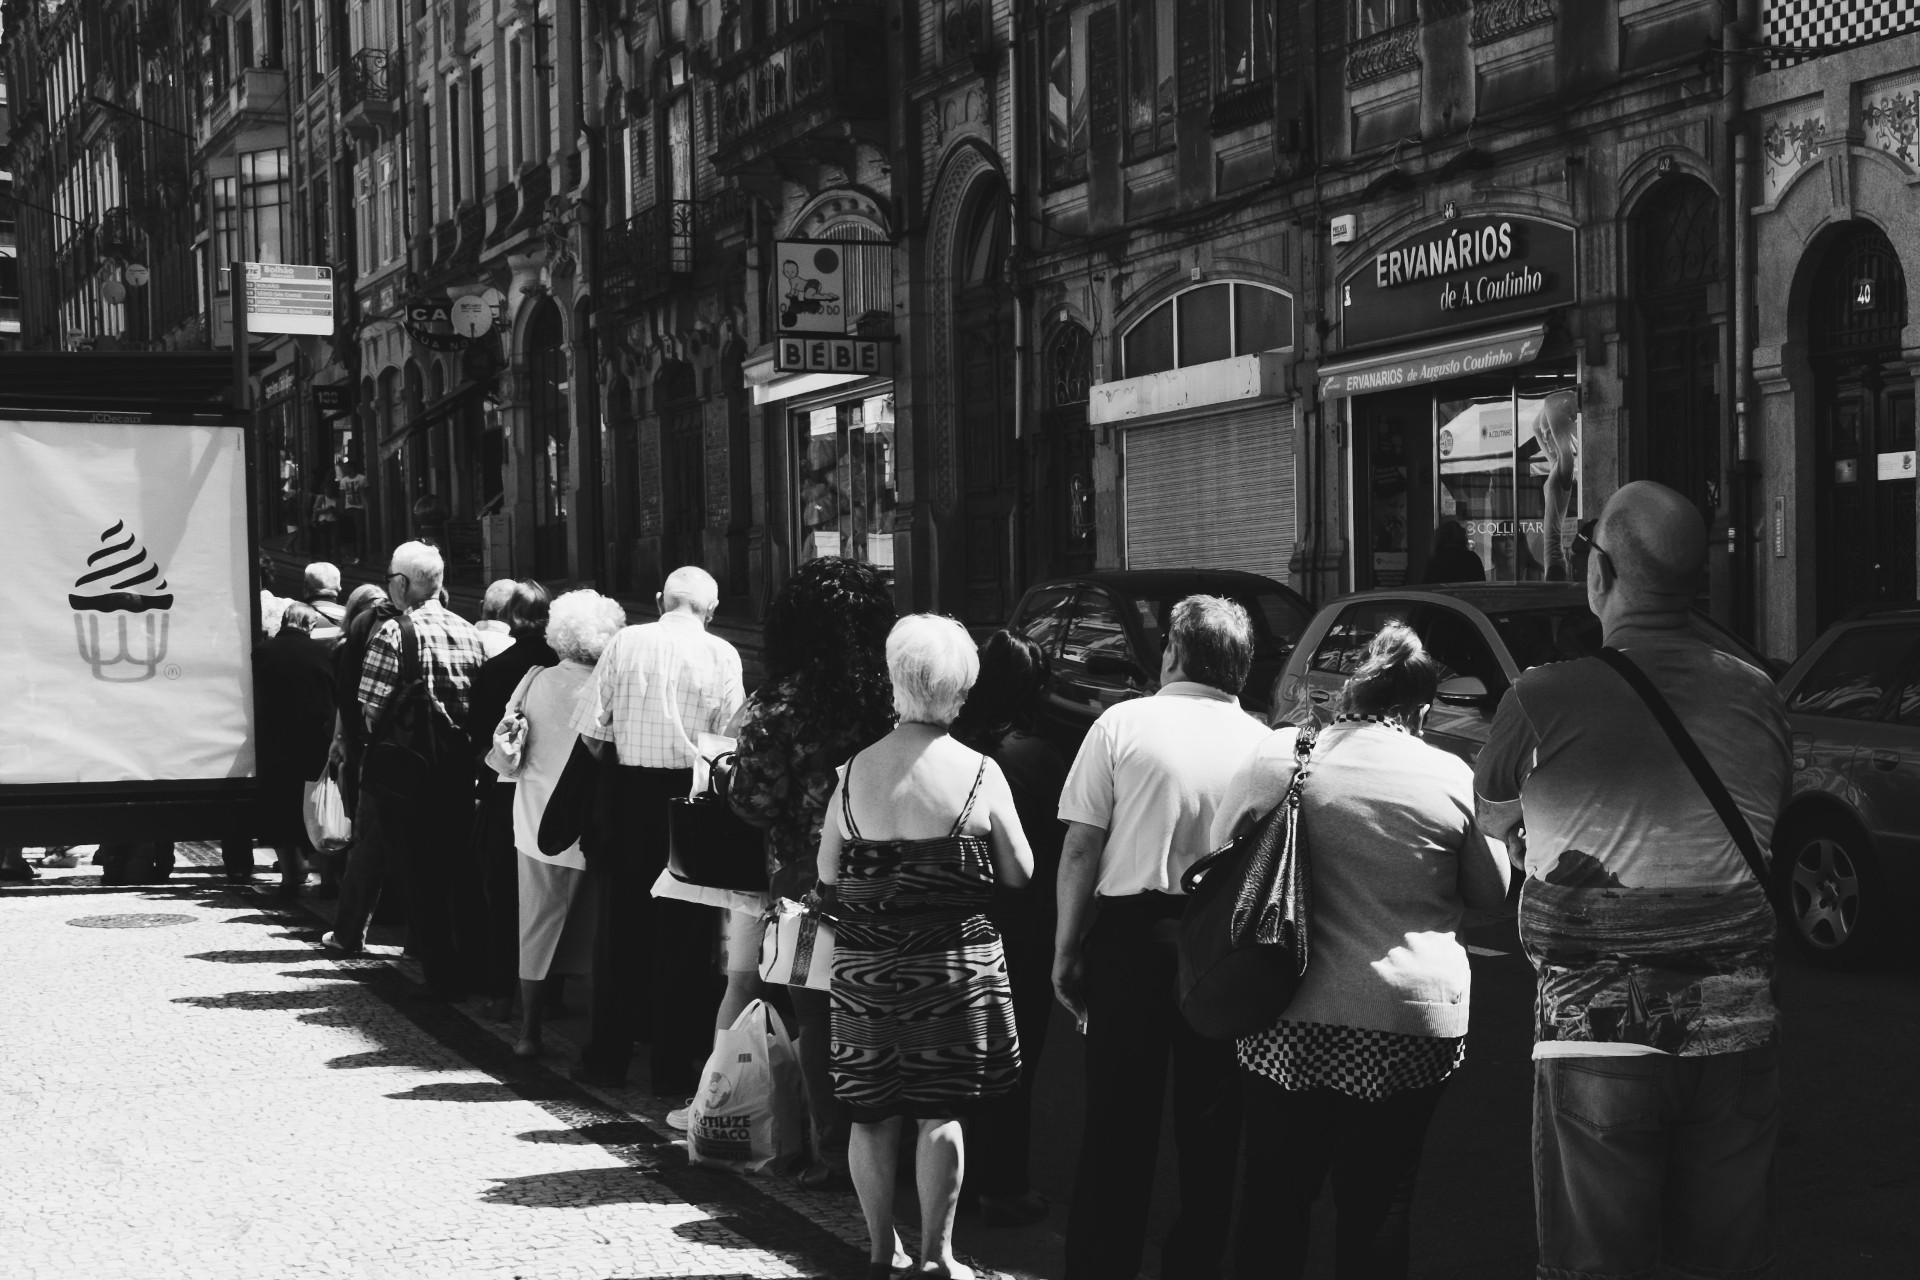

In [1]:
from PIL import Image

IMAGE_PATH = "../data/pexels-catia-matos-1604200.jpg"

Image.open(IMAGE_PATH)

## Instantiate the model

Several models are available in the original repository, targeted for different tasks. We need to specify a path to the model checkpoint to load the model. It can be some local path or name available on the models' hub (in this case model checkpoint will be downloaded automatically).

Making prediction, the model accepts a path to input image and returns a list with the Result class object. Also, it includes utilities for processing results, e.g., `plot()` method for drawing.

In [2]:
from ultralytics import YOLO

# the name of the model we want to use
DET_MODEL_NAME = "yolov8m"

# create a model
det_model = YOLO(f"../model/{DET_MODEL_NAME}.pt")

# class 0 means person
res = det_model(IMAGE_PATH, classes=[0])[0]


image 1/1 /home/adrian/repos/intelligent-queue-management-openvino/data/pexels-catia-matos-1604200.jpg: 448x640 14 persons, 11.8ms
Speed: 0.3ms preprocess, 11.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Let's show the result to be sure everything works correctly.

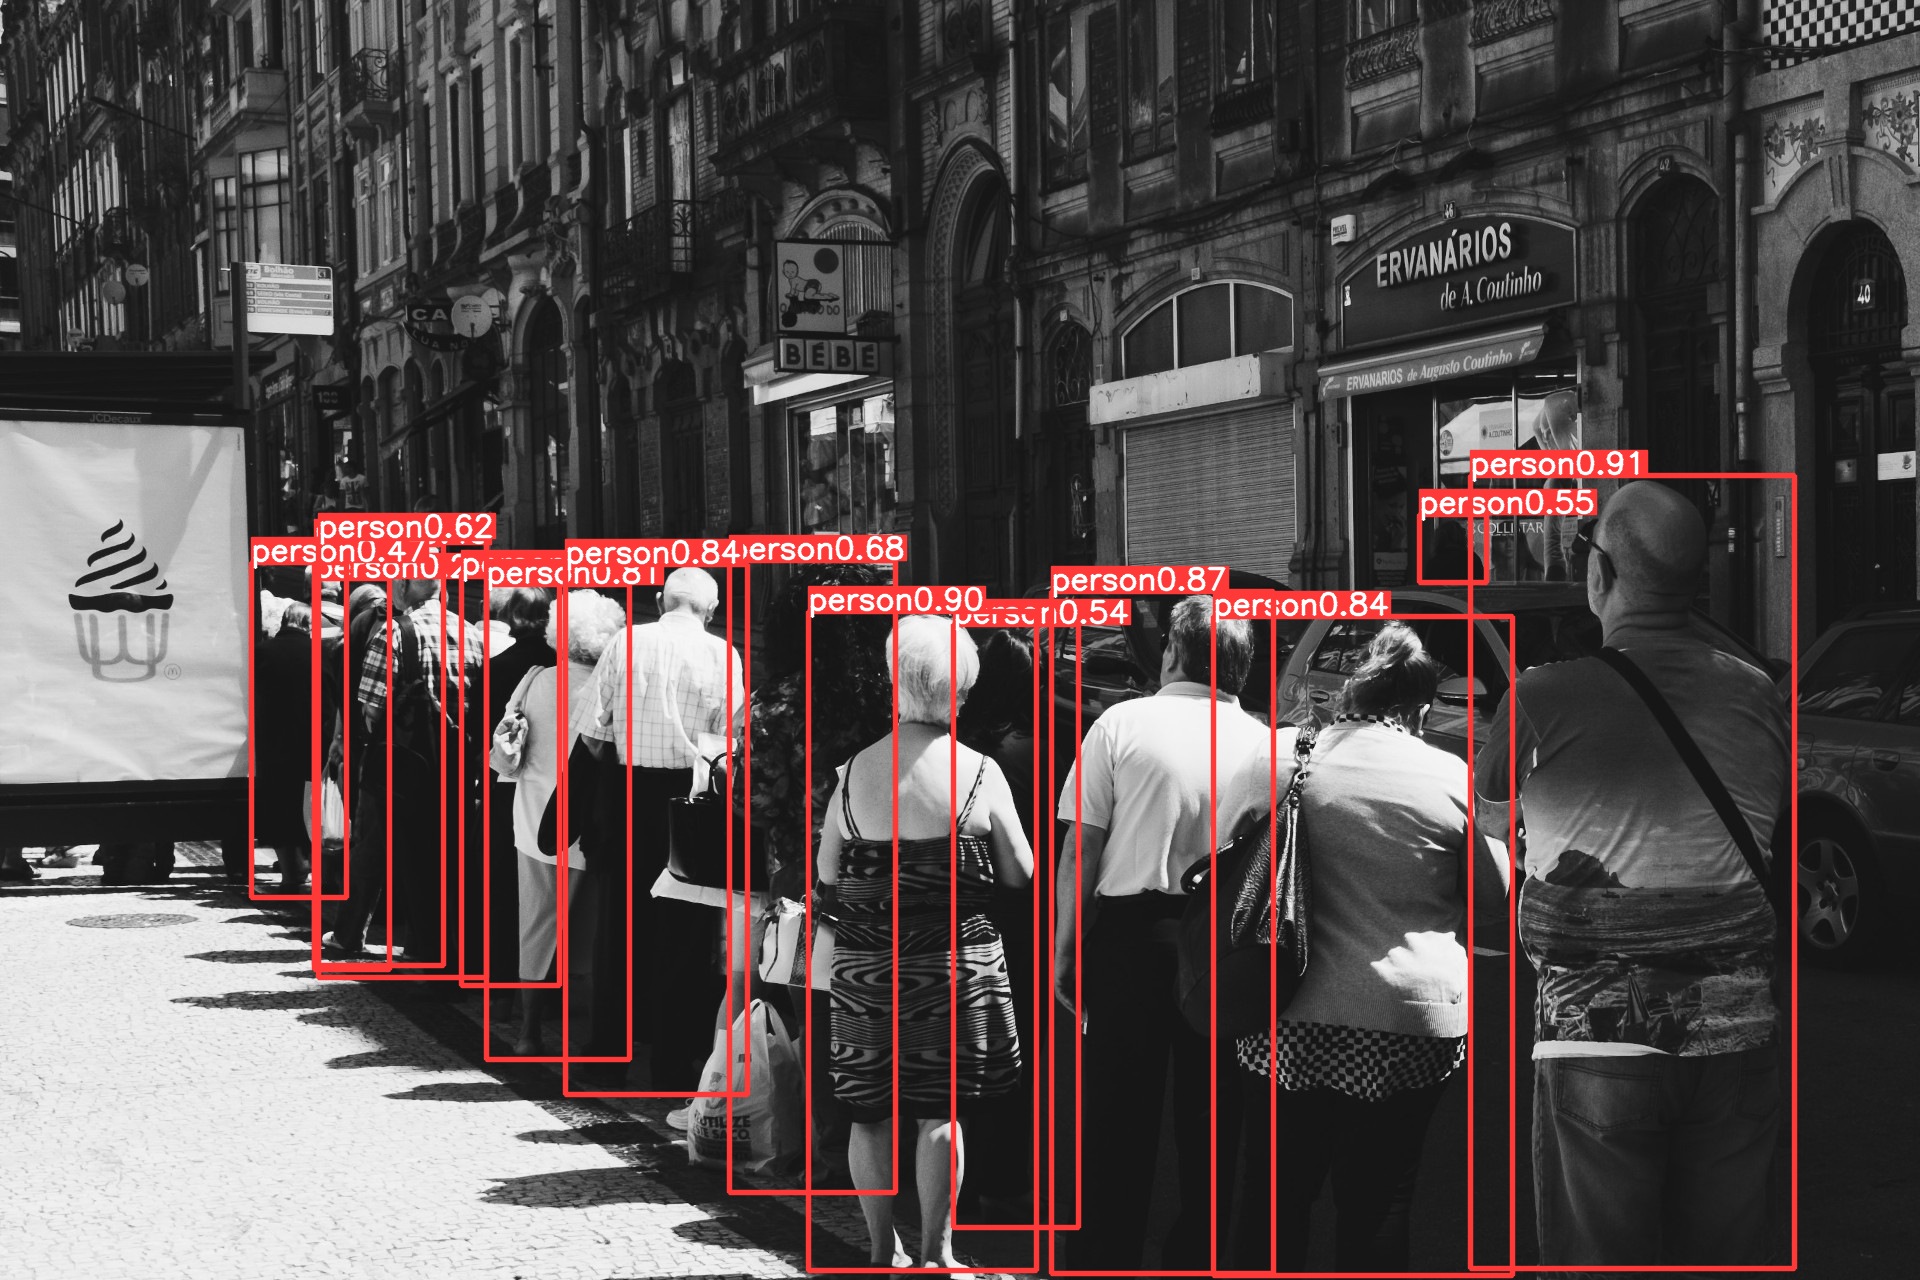

In [3]:
Image.fromarray(res.plot(line_width=3)[:, :, ::-1])

## Convert model to OpenVINO IR

YOLOv8 provides API for convenient model exporting to different formats, including OpenVINO IR. `model.export` is responsible for model conversion. We need to specify the format, and additionally, we could preserve dynamic shapes in the model. It would limit us to use CPU only, so we're not doing this. Also, we specify we want to use half-precision (FP16) to get better performance.

In [4]:
# export model to OpenVINO format
out_dir = det_model.export(format="openvino", dynamic=False, half=True)

Ultralytics YOLOv8.0.54 🚀 Python-3.10.6 torch-1.13.1+cu117 CPU

PyTorch: starting from ../model/yolov8m.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (49.7 MB)

ONNX: starting export with onnx 1.13.1...
ONNX: export success ✅ 1.3s, saved as ../model/yolov8m.onnx (98.8 MB)

OpenVINO: starting export with openvino 2022.3.0-9052-9752fafe8eb-releases/2022/3...
OpenVINO: export success ✅ 1.2s, saved as ../model/yolov8m_openvino_model/ (149.5 MB)

Export complete (3.0s)
Results saved to /home/adrian/repos/intelligent-queue-management-openvino/model
Predict:         yolo predict task=detect model=../model/yolov8m_openvino_model imgsz=640 
Validate:        yolo val task=detect model=../model/yolov8m_openvino_model imgsz=640 data=coco.yaml 
Visualize:       https://netron.app


And we're done! The model has been exported to `model/yolov8_openvino_model` directory. Now it's time to use it in production!